In [1]:
%reload_ext autoreload
%reload_ext tensorboard
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

# imports
import numpy as np
import matplotlib.pyplot as plt


from train import train_model
from evaluation import inference
from configs import train_args, inference_args


### IMPORTANT: RUN `data_preprocess.py ./project_data` IF YOU HAVE NOT DONE THIS BEFORE

D:\Python\Python39\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [2]:
# utils
def visualize(item: tuple):
    fig=plt.figure(num=1,figsize=(12,4))
    ax1=fig.add_subplot(131)
    ax1.imshow(item[0], aspect='auto')
    ax1.set_title("x")
    
    ax2=fig.add_subplot(132)
    ax2.imshow(item[1], aspect='auto')
    ax2.set_title("y")
    
    ax3=fig.add_subplot(133)
    ax3.imshow(item[2], aspect='auto')
    ax3.set_title("y_pred")
    
    plt.suptitle(f'PSNR: {item[3]:.4f}')
    
    plt.show()

In [9]:
# train the model and save the model parameters
train_model(**train_args)

# after training, open your tensorboard by running:
# %tensorboard --logdir ./logs

  0%|          | 0/100 [00:00<?, ?it/s]

epoch 1/100, average loss: -0.0240


KeyboardInterrupt: 

In [2]:
results = inference(**inference_args)
# (x, y, y_pred, psnr_score)

inference completed.


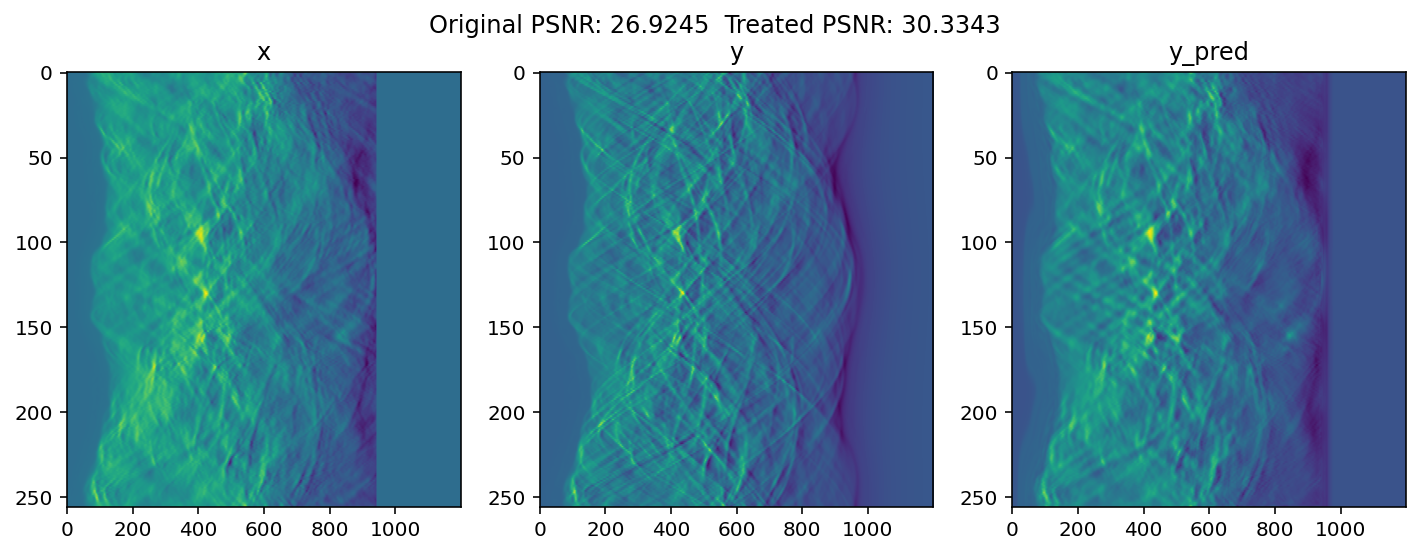

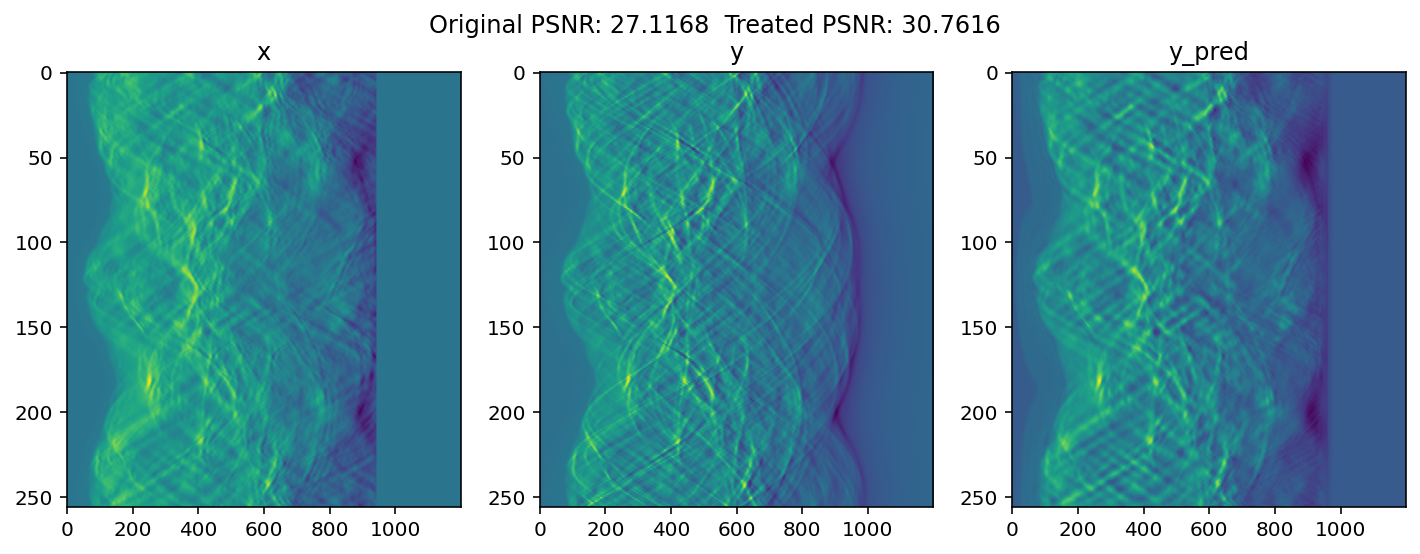

In [8]:
for item in results:
    visualize(item)

In [7]:
from skimage.metrics import peak_signal_noise_ratio as psnr
def visualize(item: tuple):
    fig=plt.figure(num=1,figsize=(12,4))
    ax1=fig.add_subplot(131)
    ax1.imshow(item[0], aspect='auto')
    ax1.set_title("x")
    
    ax2=fig.add_subplot(132)
    ax2.imshow(item[1], aspect='auto')
    ax2.set_title("y")
    
    ax3=fig.add_subplot(133)
    ax3.imshow(item[2], aspect='auto')
    ax3.set_title("y_pred")

    p2 =  psnr(item[0], item[1], data_range=1)
    
    plt.suptitle(f'Original PSNR: {p2:.4f}  Treated PSNR: {item[3]:.4f}')
    
    plt.show()